In [1]:
import nltk
import lzma
import math as m
import seaborn as sns

from random import choice

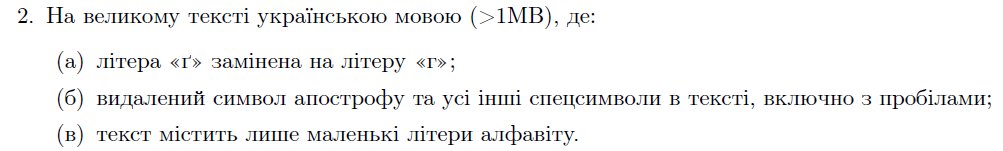

In [2]:
def read_and_clean(filename):
    with open(filename, 'r', encoding = 'utf-8', errors = 'ignore') as file:
        text = file.read().lower()

    data = ''.join(s for s in text if s.isalpha())

    for s in 'abcdefghijklmnopqrstuvwxyz':
        data = data.replace(s, '')

    data = data.replace('ѳ', '')
    data = data.replace('ы', '')
    data = data.replace('ґ', 'г')

    return data

data = read_and_clean('Tolkin_Volodar-Persteniv_RuLit_Me.txt')
data
#3.73MB

'джрртолкінволодарперстенівкартинкатриперснідляельфівдляїхкоролівсімгордимгномамзкаміннихпалатщедевятьлюдямсмертнихродіводинповелителютьмидеімлавмордорідеморокітіньназемліодинзнихкеруєодинвсіхзнайдеодинїхзберейупітьмівсіхзведевмордорідеморокітіньназемліпрологпрогобітівуційкнизійтиметьсяздебільшогопрогобітівізїїсторінокчитачдовідаєтьсячималопроїхнювдачуадещоіпроісторіюдеяківідомостіпрогобітівможнатакожзнайтиувибранихуривкахізчервоноїкнигизахідногопограниччящовжевийшлипідназвоюгобітцюоповідьузятозпершихрозділівчервоноїкнигиякунаписавсамбільбопершийгобітякийпрославивсянавесьсвітіназваввінцірозділитудиіназадоскількивнихбулоописанойогоподорожнасхідіповерненнядодомупригодуяказгодомвтягнулавсіхгобітівувеликіподіїтієїепохипроякурозповідаєтьсятутбагатохтооднакзахочещенасамомупочаткуоповідідізнатисядещобільшепроцейдивовижнийнародтимчасомневкожногознайдетьсяпершакнижкадлятакихчитачівподаємокільканайважливішихнотатоквибраногозгобітськихпереказіватакожкороткопереповідаємопершупригодугобітинепримітн

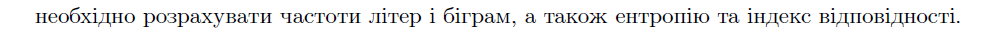

In [3]:
def letters_frequencies(data):
    lett, freq = [], []

    for pair in nltk.FreqDist(data).most_common():
        lett.append(pair[0])
        freq.append(pair[1] / len(data))

    return sorted(dict(zip(lett, freq)).items(), key = lambda x: x[1], reverse = True)

letters_frequencies(data)

[('о', 0.0976413758291995),
 ('а', 0.08078130734412592),
 ('и', 0.06743255917500504),
 ('н', 0.06312661803425576),
 ('і', 0.06254690852823218),
 ('в', 0.06059397080071549),
 ('е', 0.049767950881191514),
 ('р', 0.04607808885425817),
 ('т', 0.044210013544923626),
 ('л', 0.0409047876731276),
 ('с', 0.04006167403794122),
 ('д', 0.03643904067995737),
 ('у', 0.034133427967787545),
 ('м', 0.031774914007919756),
 ('к', 0.030524019921728197),
 ('п', 0.029859447997522458),
 ('з', 0.025366148271176205),
 ('я', 0.022731004870221116),
 ('г', 0.020730676441641657),
 ('б', 0.019155762213300034),
 ('ь', 0.013676074639252064),
 ('ч', 0.013075425056014707),
 ('й', 0.012167286970532903),
 ('х', 0.011423363174780212),
 ('ш', 0.009694153640652846),
 ('ж', 0.008315414872524525),
 ('ю', 0.006725071113604327),
 ('щ', 0.005878651150436821),
 ('ц', 0.0050322311872693145),
 ('ї', 0.004049149667548721),
 ('є', 0.003233588765538364),
 ('ф', 0.002869892687614826)]

In [4]:
def bigrams_frequencies(data):
    bigr, freq = [], []

    bigram_dist = nltk.FreqDist(nltk.bigrams(data)).most_common()
    bigram_сount = sum(pair[1] for pair in bigram_dist)

    for pair in bigram_dist:
        bigr.append(pair[0])
        freq.append(pair[1] / bigram_сount)

    return sorted(dict(zip(bigr, freq)).items(), key = lambda x: x[1], reverse = True)

bigrams_frequencies(data)

[(('н', 'а'), 0.013713561470215463),
 (('л', 'и'), 0.0120835399790599),
 (('в', 'і'), 0.011406844106463879),
 (('о', 'в'), 0.011297735162836832),
 (('р', 'о'), 0.01127789717308646),
 (('а', 'в'), 0.01027056813798424),
 (('п', 'о'), 0.010086515677522456),
 (('г', 'о'), 0.009851766132143053),
 (('а', 'л'), 0.009043919105086241),
 (('н', 'е'), 0.008733123932330413),
 (('и', 'в'), 0.008327547252989474),
 (('д', 'о'), 0.00829227971565548),
 (('о', 'р'), 0.008248195293987987),
 (('е', 'р'), 0.008225050972612552),
 (('т', 'и'), 0.008136882129277566),
 (('т', 'а'), 0.008027773185650521),
 (('о', 'д'), 0.007992505648316526),
 (('з', 'а'), 0.007985892985066401),
 (('с', 'т'), 0.007930787457982036),
 (('о', 'г'), 0.007886703036314542),
 (('н', 'и'), 0.007751143439687001),
 (('і', 'в'), 0.007721386455061443),
 (('і', 'н'), 0.0076982421336860085),
 (('н', 'і'), 0.00762329861685127),
 (('с', 'я'), 0.007149391083925718),
 (('і', 'д'), 0.007081060230341103),
 (('в', 'о'), 0.007001708271339615),
 (('о'

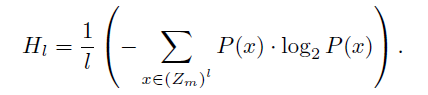

In [5]:
def specific_entropy(l, fr_dist):
    return sum(pair[1] * m.log2(pair[1]) for pair in fr_dist) / -l

symbol_entropy = specific_entropy(1, letters_frequencies(data))
bigram_entropy = specific_entropy(2, bigrams_frequencies(data))

print(f'H1 = {symbol_entropy}')
print(f'H2 = {bigram_entropy}')

H1 = 4.56442743743937
H2 = 4.19165984892223


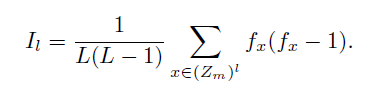

In [6]:
def conformity_index(l, data):
    L = len(data)
    if l == 1:
        fr_dist = letters_frequencies(data)
        k = L
    if l == 2:
        fr_dist = bigrams_frequencies(data)
        k = sum(pair[1] for pair in nltk.FreqDist(nltk.bigrams(data)).most_common())
    return sum(k * pair[1] * (k * pair[1] - 1) for pair in fr_dist) / (L * (L - 1))

I1 = conformity_index(1, data)
I2 = conformity_index(2, data)

print(f'I1 = {I1}')
print(f'I2 = {I2}')

I1 = 0.05022952350109752
I2 = 0.0045195731017181814


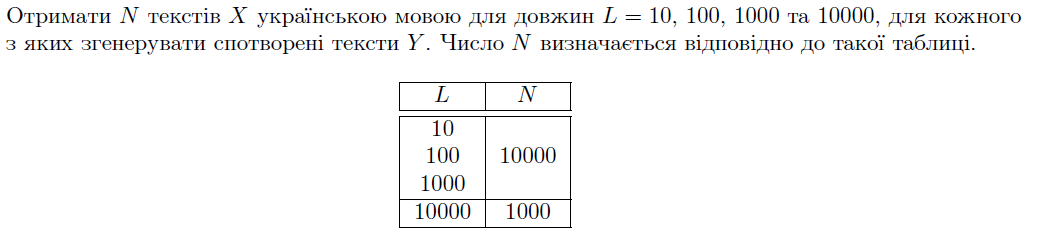

In [7]:
def generate_samples(data, L, method, r, mode = 1):
    samples = []
    r = 10000 if L <= 1000 else 1000
    if method == 'V':
        for i in range(r):
            pos = choice(range(len(data) - L - 1))
            samples.append(Vigenere(data[pos:pos + L], r))
    if method == 'A':
        for i in range(r):
            pos = choice(range(len(data) - L - 1))
            samples.append(Affine(data[pos:pos + L], mode))
    if method == 'U':
        for i in range(r):
            samples.append(Uniform(L, mode))
    if method == 'F':
        for i in range(r):
            samples.append(Fibonacci(L, mode))
    return samples

In [8]:
s_alphabet = 'абвгдеєжзиіїйклмнопрстуфхцчшщьюя'

def grouper(iterable, n):
    args = [iter(iterable)] * n
    return zip(*args)

def get_bigram_num(bigram):
    return 32 * s_alphabet.index(bigram[0]) + s_alphabet.index(bigram[1])

def get_bigram_by_num(n):
    return s_alphabet[(n - n % 32) // 32] + s_alphabet[n % 32]

def text_encode(text, mode):
    ret = []
    if mode == 1:
        for s in text:
            ret.append(s_alphabet.index(s))
        return ret
    if mode == 2:
        for bigram in grouper(text, 2):
            ret.append(get_bigram_num(bigram))
        return ret

def text_decode(text, mode):
    ret = ''
    if mode == 1:
        for i in text:
            ret += s_alphabet[i]
        return ret
    if mode == 2:
        for i in text:
            ret += get_bigram_by_num(i)
        return ret

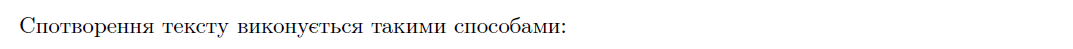

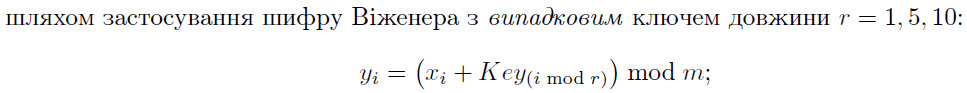

In [9]:
def Vigenere(text, r):
    buff = []
    encoded = text_encode(text, 1)
    key = text_encode(''.join(choice(s_alphabet) for i in range(r)), 1)
    for i in encoded:
        buff.append((i + key[i % r]) % 32)
    return text_decode(buff, 1)

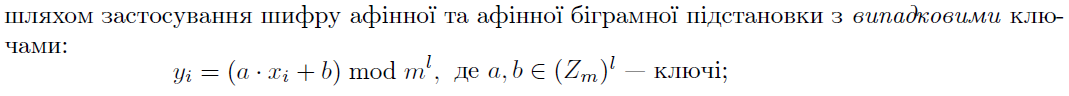

In [10]:
def Affine(text, mode):
    buff = []
    encoded = text_encode(text, mode)
    if mode == 1:
        a = choice(range(32))
        b = choice(range(32))
        for i in encoded:
            buff.append((a * i + b) % 32)
        return text_decode(buff, 1)
    if mode == 2:
        a = choice(range(1024))
        b = choice(range(1024))
        for i in encoded:
            buff.append((a * i + b) % 1024)
        return text_decode(buff, 2)

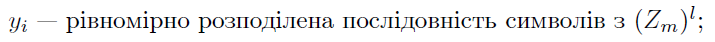

In [11]:
def Uniform(size, mode):
    buff = []
    if mode == 1:
        for i in range(size):
            buff.append(choice(range(32)))
        return text_decode(buff, 1)
    if mode == 2:
        for i in range(int(size / 2)):
            buff.append(choice(range(1024)))
        return text_decode(buff, 2)

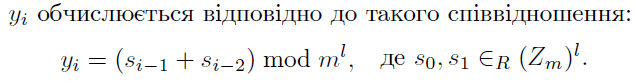

In [12]:
def Fibonacci(size, mode):
    buff = []
    if mode == 1:
        s0 = choice(range(32))
        s1 = choice(range(32))
        buff.append(s0)
        buff.append(s1)
        for i in range(2, size):
            buff.append((buff[i - 1] + buff[i - 2]) % 32)
        return text_decode(buff, 1)
    if mode == 2:
        s0 = choice(range(1024))
        s1 = choice(range(1024))
        buff.append(s0)
        buff.append(s1)
        for i in range(2, int(size / 2)):
            buff.append((buff[i - 1] + buff[i - 2]) % 1024)
        return text_decode(buff, 2) 

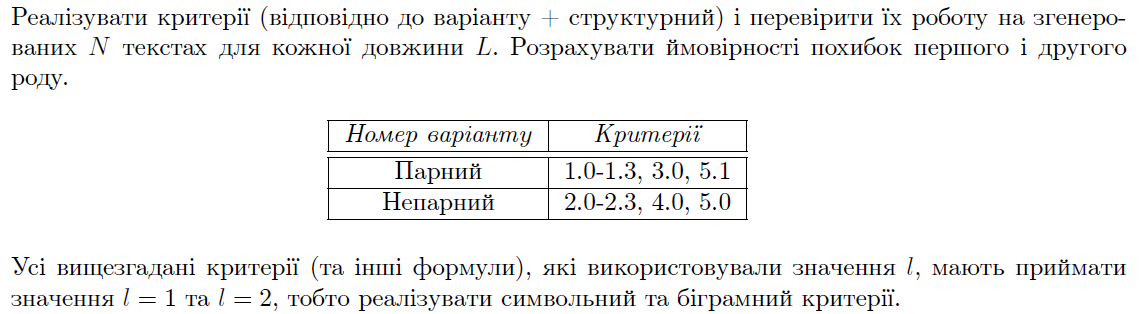

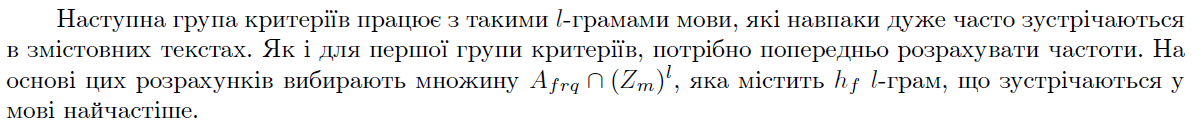

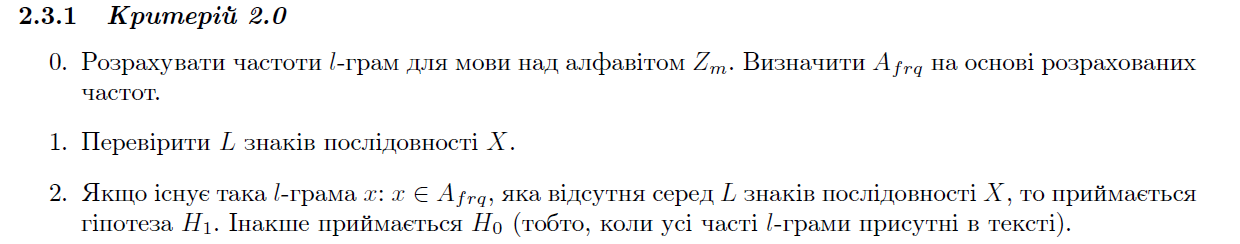

In [13]:
def criteria_2_0(data, text, A_frq_size, L, mode = 1):
    sample = text[:L]

    if mode == 1:

        alphab_letters_freq = letters_frequencies(data)[:A_frq_size]
        alphab_letters = []
        for pair in alphab_letters_freq:
            alphab_letters.append(pair[0])

        sample_letters_freq = letters_frequencies(sample)
        sample_letters = []
        for pair in sample_letters_freq:
            sample_letters.append(pair[0])

        return 'H0' if set(alphab_letters).issubset(set(sample_letters)) else 'H1'

    if mode == 2:

        alphab_bigrams_freq = bigrams_frequencies(data)[:A_frq_size]
        alphab_bigrams = []
        for pair in alphab_bigrams_freq:
            alphab_bigrams.append(pair[0])

        sample_bigrams_freq = bigrams_frequencies(sample)
        sample_bigrams = []
        for pair in sample_bigrams_freq:
            sample_bigrams.append(pair[0])

        return 'H0' if set(alphab_bigrams).issubset(set(sample_bigrams)) else 'H1'

criteria_2_0(data, data, 3, 10000)

'H0'

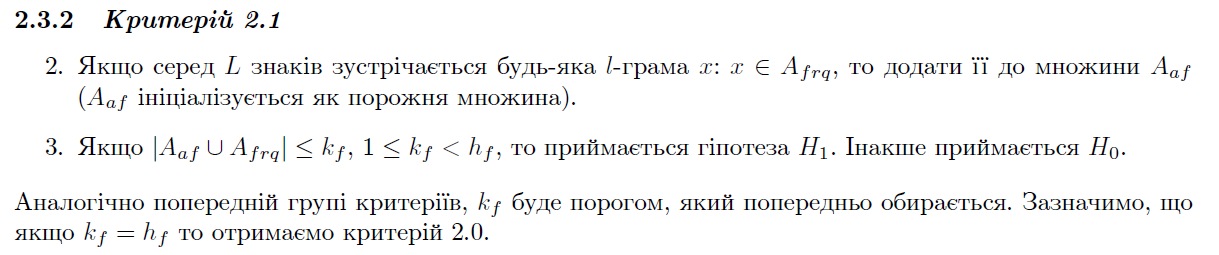

In [14]:
def criteria_2_1(data, text, A_frq_size, L, kf, mode = 1):
    sample = text[:L]

    if mode == 1:

        alphab_letters_freq = letters_frequencies(data)[:A_frq_size]
        alphab_letters = []
        for pair in alphab_letters_freq:
            alphab_letters.append(pair[0])

        sample_letters_freq = letters_frequencies(sample)
        sample_letters = []
        for pair in sample_letters_freq:
            sample_letters.append(pair[0])
        
        Aaf = []

        for letter in sample_letters:
            if letter in alphab_letters:
                Aaf.append(letter)

        return 'H1' if len(set(Aaf).union(set(alphab_letters))) <= kf else 'H0'

    if mode == 2:

        alphab_bigrams_freq = bigrams_frequencies(data)[:A_frq_size]
        alphab_bigrams = []
        for pair in alphab_bigrams_freq:
            alphab_bigrams.append(pair[0])

        sample_bigrams_freq = bigrams_frequencies(sample)
        sample_bigrams = []
        for pair in sample_bigrams_freq:
            sample_bigrams.append(pair[0])
        
        Aaf = []

        for bigram in sample_bigrams:
            if bigram in alphab_bigrams:
                Aaf.append(bigram)

        return 'H1' if len(set(Aaf).union(set(alphab_bigrams))) <= kf else 'H0'

criteria_2_1(data, data, 3, 10000, 2)

'H0'

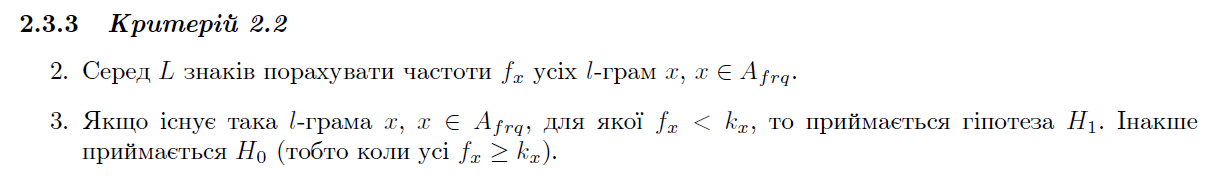

In [15]:
def criteria_2_2(data, text, A_frq_size, L, mode = 1):
    sample = text[:L]

    if mode == 1:

        alphab_letters_freq = letters_frequencies(data)[:A_frq_size]
        alphab_letters = []
        for pair in alphab_letters_freq:
            alphab_letters.append(pair[0])

        sample_letters_freq = letters_frequencies(sample)
        sample_letters = []
        for pair in sample_letters_freq:
            sample_letters.append(pair[0])

        kx = alphab_letters_freq[A_frq_size - 1][1]

        ret = []

        for pair in sample_letters_freq:
            for letter in list(set(alphab_letters).intersection(set(sample_letters))):
                if pair[0] == letter:
                    ret.append(True if pair[1] >= kx else False)

        return 'H1' if False in ret else 'H0'

    if mode == 2:

        alphab_bigrams_freq = bigrams_frequencies(data)[:A_frq_size]
        alphab_bigrams = []
        for pair in alphab_bigrams_freq:
            alphab_bigrams.append(pair[0])

        sample_bigrams_freq = bigrams_frequencies(sample)
        sample_bigrams = []
        for pair in sample_bigrams_freq:
            sample_bigrams.append(pair[0])

        kx = alphab_bigrams_freq[A_frq_size - 1][1]

        ret = []

        for pair in sample_bigrams_freq:
            for bigram in list(set(alphab_bigrams).intersection(set(sample_bigrams))):
                if pair[0] == bigram:
                    ret.append(True if pair[1] >= kx else False)

        return 'H1' if False in ret else 'H0'

criteria_2_2(data, data, 3, 10000)

'H0'

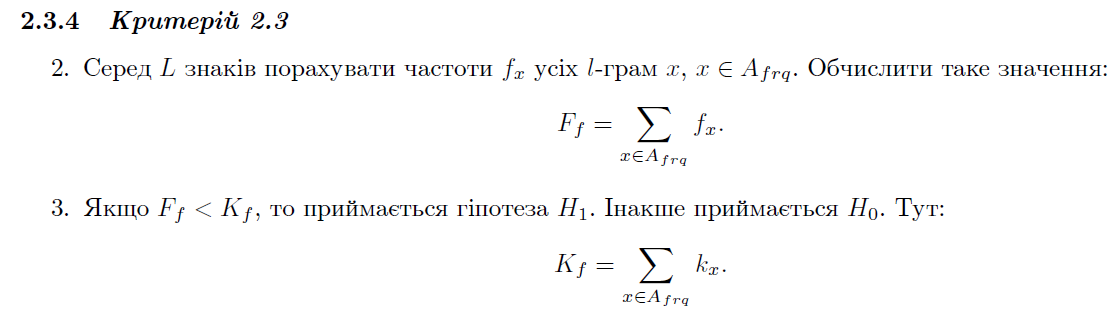

In [16]:
def criteria_2_3(data, text, A_frq_size, L, mode = 1):
    sample = text[:L]

    if mode == 1:

        alphab_letters_freq = letters_frequencies(data)[:A_frq_size]
        alphab_letters = []
        for pair in alphab_letters_freq:
            alphab_letters.append(pair[0])

        sample_letters_freq = letters_frequencies(sample)
        sample_letters = []
        for pair in sample_letters_freq:
            sample_letters.append(pair[0])

        Kf = sum(pair[1] for pair in alphab_letters_freq)
        Ff = []
        
        for pair in sample_letters_freq:
            for letter in list(set(alphab_letters).intersection(set(sample_letters))):
                if pair[0] == letter:
                    Ff.append(pair[1])

        return 'H1' if sum(Ff) < Kf else 'H0'

    if mode == 2:

        alphab_bigrams_freq = bigrams_frequencies(data)[:A_frq_size]
        alphab_bigrams = []
        for pair in alphab_bigrams_freq:
            alphab_bigrams.append(pair[0])

        sample_bigrams_freq = bigrams_frequencies(sample)
        sample_bigrams = []
        for pair in sample_bigrams_freq:
            sample_bigrams.append(pair[0])

        Kf = sum(pair[1] for pair in alphab_bigrams_freq)
        Ff = []
        
        for pair in sample_bigrams_freq:
            for bigram in list(set(alphab_bigrams).intersection(set(sample_bigrams))):
                if pair[0] == bigram:
                    Ff.append(pair[1])

        return 'H1' if sum(Ff) < Kf else 'H0'


criteria_2_3(data, data, 3, 10000)

'H0'

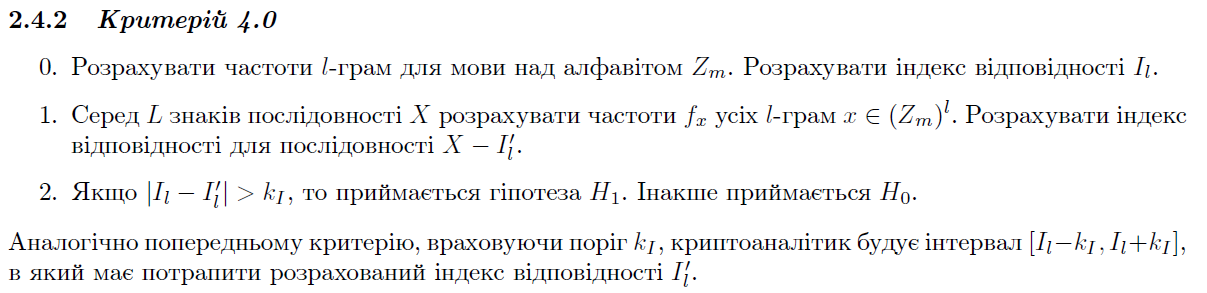

In [17]:
def criteria_4_0(data, text, L, k, mode = 1):
    sample = text[:L]

    I = conformity_index(mode, data)
    I_ = conformity_index(mode, sample)

    return 'H1' if abs(I - I_) > k else 'H0'


criteria_4_0(data, data, 10000, 0.001)

'H0'

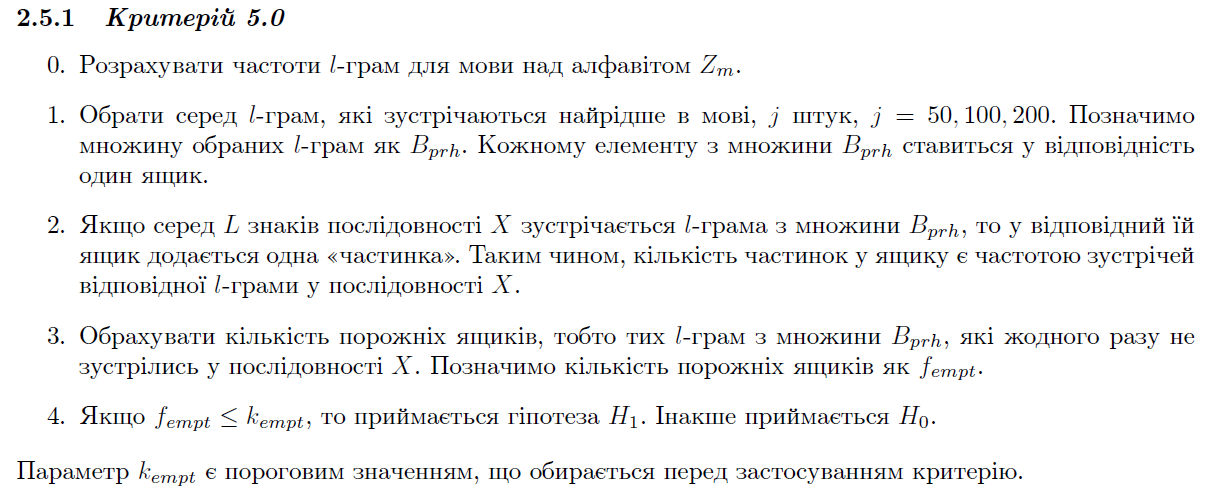

In [18]:
def criteria_5_0(data, text, L, j, kempt, mode = 1):
    sample = text[:L]

    if mode == 1:

        uncommon_letters_freq = letters_frequencies(data)[-j:]
        Bprh_l = []
        for pair in uncommon_letters_freq:
            Bprh_l.append(pair[0])

        sample_letters_freq = letters_frequencies(sample)
        sample_letters = []
        for pair in sample_letters_freq:
            sample_letters.append(pair[0])

        return 'H1' if len(set(Bprh_l).difference(set(sample_letters))) <= kempt else 'H0'

    if mode == 2:

        uncommon_bigrams_freq = bigrams_frequencies(data)[-j:]
        Bprh_b = []
        for pair in uncommon_bigrams_freq:
            Bprh_b.append(pair[0])

        sample_bigrams_freq = bigrams_frequencies(sample)
        sample_bigrams = []
        for pair in sample_bigrams_freq:
            sample_bigrams.append(pair[0])

        return 'H1' if len(set(Bprh_b).difference(set(sample_bigrams))) <= kempt else 'H0'


criteria_5_0(data, data, 10000, 50, 10, mode = 2)

'H0'

In [19]:
def sample_criterial_test(data, samples, criteria_name, A_frq_size, L, kf, k, kempt, mode):
    results = []

    for text in samples:
        if criteria_name == '2_0':
            results.append(criteria_2_0(data, text, A_frq_size, L, mode))

        if criteria_name == '2_1':
            results.append(criteria_2_1(data, text, A_frq_size, L, kf, mode))

        if criteria_name == '2_2':
            results.append(criteria_2_2(data, text, A_frq_size, L, mode))

        if criteria_name == '2_3':
            results.append(criteria_2_3(data, text, A_frq_size, L, mode))

        if criteria_name == '4_0':
            results.append(criteria_4_0(data, text, L, k, mode))

        if criteria_name == '5_0':
            results.append(criteria_5_0(data, text, L, j, kempt, mode))

        if criteria_name == 's':
            results.append(structural_criteria(text))
    
    #alpha = 
    #beta =

    #return alpha, beta

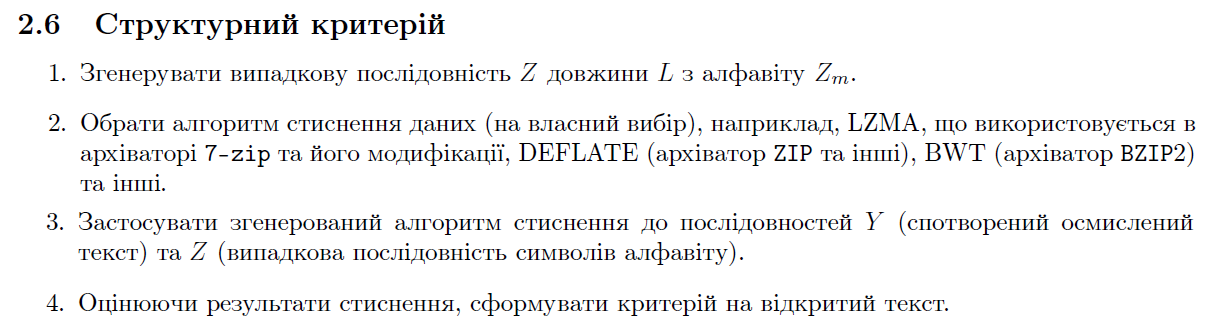

In [20]:
def LZMA(text, L):
    Y = Vigenere(text, 5)
    Z = Uniform(L, 1)

    y = lzma.compress(bytes(Y, 'utf-8'))
    z = lzma.compress(bytes(Z, 'utf-8'))
    return len(y), len(z)

In [21]:
def LZMA_test(data):
    lt = []
    ls = []
    for i in range(100):
        t, s = LZMA(data[:10000], 10000)
        lt.append(t)
        ls.append(s)
    return lt, ls

lt, ls = LZMA_test(data)

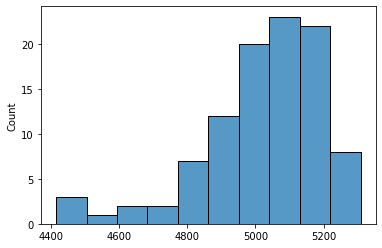

In [22]:
sns.histplot(data = lt)

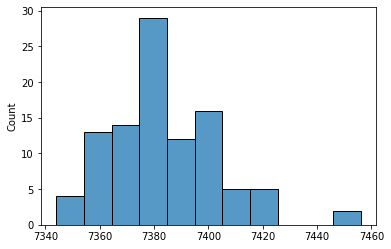

In [23]:
sns.histplot(data = ls)

In [24]:
def structural_criteria(text):
    return 'H0' if 0.48 * len(text) <= len(lzma.compress(bytes(text, 'utf-8'))) <= 0.54 * len(text) else 'H1'

structural_criteria(data[:10000])

'H0'

In [25]:
structural_criteria(Affine(data[:10000], 1))

'H0'

In [26]:
structural_criteria(Uniform(10000, 1))

'H1'

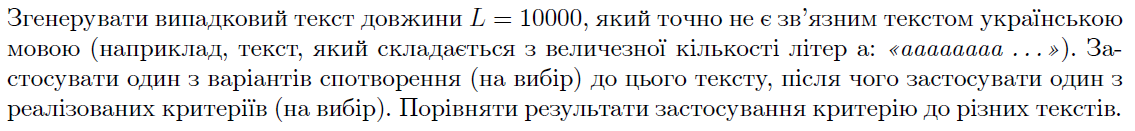

In [27]:
def generate_nontext():
    return Affine((choice(s_alphabet) * 5 + choice(s_alphabet) * 5) * 1000, 2)

criteria_2_0(data, generate_nontext(), 10, 1000, 1)

'H1'